## Environment Set up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## Data Acquisition

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/COVID-19_Daily_Testing.csv')

In [ ]:
df.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
df.shape

(89, 59)

In [ ]:
df.columns

Index(['Date', 'Day', 'Tests', 'Cases', 'People Not-Positive - Total',
       'People Tested - Age 0-17', 'People Tested - Age 18-29',
       'People Tested - Age 30-39', 'People Tested - Age 40-49',
       'People Tested - Age 50-59', 'People Tested - Age 60-69',
       'People Tested - Age 70-79', 'People Tested - Age 80+',
       'People Tested - Age Unknown', 'People Tested - Female',
       'People Tested - Male', 'People Tested - Gender Unknown',
       'People Tested - Latinx', 'People Tested - Asian Non-Latinx',
       'People Tested - Black Non-Latinx', 'People Tested - White Non-Latinx',
       'People Tested - Other Race Non-Latinx',
       'People Tested - Unknown Race/Ethnicity', 'People Positive - Age 0-17',
       'People Positive - Age 18-29', 'People Positive - Age 30-30',
       'People Positive - Age 40-49', 'People Positive - Age 50-59',
       'People Positive - Age 60-69', 'People Positive - Age 70-79',
       'People Positive - Age 80+', 'People Positive - Age Un

## Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
df = df.replace(',','', regex =True)
df['People Positive - Female'] = pd.to_numeric(df['People Positive - Female'])
df.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,2431,705,1726,129,470,458,458,412,281,128,94,1,1238,1158,35,569,39,376,276,73,1098,24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,4098,772,3326,260,805,833,685,604,471,253,171,16,2049,1786,263,848,55,581,510,144,1960,48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,1654,1424,248,529,43,430,442,109,1773
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
X = df[['People Positive - Female', 'Tests', 'Cases']]
X.shape

(89, 3)

In [ ]:
y = df['People Positive - Asian Non-Latinx']
y.head()

0     0
1     9
2    12
3     0
4     0
Name: People Positive - Asian Non-Latinx, dtype: int64

In [ ]:
X.shape

(89, 3)

In [ ]:
y.shape

(89,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linReg = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66, 3)
(23, 3)
(66,)
(23,)


In [ ]:
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(linReg.intercept_)

4.47815742797832


In [ ]:
print(linReg.coef_)

[ 0.04184667 -0.00373358  0.00963255]


In [ ]:
y_pred = linReg.predict(x_test)

In [ ]:
y_pred

array([ 6.70546061,  8.41014291,  7.1612216 , 18.63669035, 17.20174841,
       13.11449454, 12.24905596,  5.82726903, 10.76035579,  4.43985065,
       20.12688582,  9.35483009, 11.00661156, 14.74300806,  3.26803143,
        8.64747673,  8.63807375,  9.7725322 ,  6.58436928,  4.38462424,
        4.52302243,  4.64633754,  4.92812298])

In [ ]:
print('Actual Values', y_test.values[0:10])

Actual Values [ 8 11  6 10 21 12 20  6  8  0]


In [ ]:
print('predicted value', y_pred[0:10])

predicted value [ 6.70546061  8.41014291  7.1612216  18.63669035 17.20174841 13.11449454
 12.24905596  5.82726903 10.76035579  4.43985065]


In [ ]:
from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)

In [ ]:
mse

14.5295616787257

In [ ]:
np.sqrt(mse)

3.811766215119403

In [ ]:
r2 = metrics.r2_score(y_test,y_pred)

In [ ]:
r2

0.5634364348491483

In [ ]:
y_test.head(10)

83     8
17    11
25     6
64    10
61    21
69    12
47    20
26     6
19     8
4      0
Name: People Positive - Asian Non-Latinx, dtype: int64

In [ ]:
y_pred[0:10]

array([ 6.70546061,  8.41014291,  7.1612216 , 18.63669035, 17.20174841,
       13.11449454, 12.24905596,  5.82726903, 10.76035579,  4.43985065])

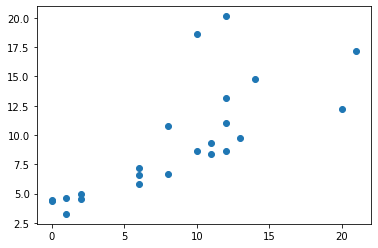

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
df.corr()

,People Tested - Age 0-17,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Gender Unknown,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx
People Tested - Age 0-17,1.000000,0.932399,0.931684,0.945866,0.946627,0.892235,0.094980,0.854287,0.763570,0.851626,0.923532,0.829434,0.962095,0.862241,0.765205,0.739177,0.625899,0.590987,0.527208,0.393173,0.209011,0.778184,0.726924,0.434658,0.836815,0.266612,0.256794,0.402842,0.606680,0.852075,0.997024,0.962812,0.957211,0.962987,0.963715,0.959361,0.924700,0.091881,0.877551,0.981689,0.844657,0.941610,0.952479,0.878927
People Tested - Age 40-49,0.932399,1.000000,0.992166,0.976334,0.950822,0.909435,0.060875,0.861832,0.897958,0.946944,0.968016,0.939751,0.931928,0.956315,0.915345,0.905384,0.838872,0.804995,0.753285,0.603448,0.206823,0.929622,0.900517,0.578006,0.935799,0.523244,0.541164,0.659389,0.796393,0.926428,0.919766,0.980349,0.990888,0.977465,0.953016,0.920726,0.887345,0.057455,0.861012,0.924305,0.918527,0.947403,0.951634,0.952724
People Tested - Age 50-59,0.931684,0.992166,1.000000,0.987026,0.960554,0.920995,0.066188,0.873110,0.900868,0.955667,0.968005,0.936211,0.923106,0.944849,0.896739,0.885681,0.834824,0.803150,0.747198,0.613770,0.235845,0.918449,0.888449,0.595031,0.922208,0.519667,0.541507,0.647317,0.791953,0.915556,0.921352,0.978246,0.987125,0.988157,0.965734,0.932795,0.897903,0.062253,0.870633,0.925963,0.923384,0.957939,0.954000,0.949705
People Tested - Age 60-69,0.945866,0.976334,0.987026,1.000000,0.981077,0.940569,0.079466,0.869845,0.879046,0.944022,0.966837,0.909352,0.923095,0.918347,0.848821,0.836020,0.772972,0.758618,0.707130,0.577134,0.263177,0.878567,0.840922,0.556455,0.887365,0.471756,0.487368,0.591690,0.745583,0.886053,0.939352,0.975245,0.982645,0.989558,0.990223,0.963465,0.930510,0.075135,0.873706,0.944109,0.913615,0.964789,0.963655,0.931809
People Tested - Age 70-79,0.946627,0.950822,0.960554,0.981077,1.000000,0.943777,0.099783,0.833489,0.828225,0.918248,0.949226,0.866750,0.917881,0.890659,0.809615,0.785265,0.717361,0.706975,0.679023,0.535095,0.313244,0.840203,0.795320,0.512373,0.851488,0.420489,0.444760,0.540984,0.681524,0.856865,0.941793,0.957841,0.966138,0.972741,0.979469,0.990050,0.945665,0.094684,0.840814,0.940269,0.869351,0.949864,0.953968,0.899671
People Tested - Age 80+,0.892235,0.909435,0.920995,0.940569,0.943777,1.000000,0.144494,0.805986,0.811411,0.881181,0.905615,0.858715,0.888658,0.882706,0.816728,0.785102,0.732521,0.734671,0.724300,0.653206,0.268734,0.847958,0.811140,0.559639,0.855640,0.469856,0.456636,0.585943,0.719914,0.862824,0.881030,0.899476,0.913292,0.920219,0.926847,0.918390,0.978525,0.140749,0.801896,0.899588,0.831053,0.899899,0.896384,0.873655
People Tested - Age Unknown,0.094980,0.060875,0.066188,0.079466,0.099783,0.144494,1.000000,0.133

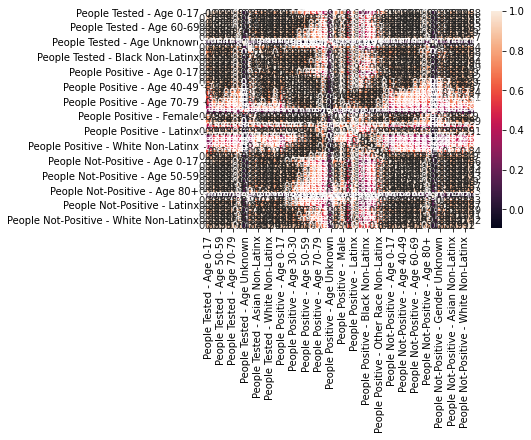

In [ ]:
sns.heatmap(df.corr(),annot=True)